0001TP_006690.png
seg.shape=(360, 480, 3), img_is.shape=(360, 480, 3)
[1 1 1]
minimum seg = 0, maximum seg = 11, Total number of segmentation classes = 12


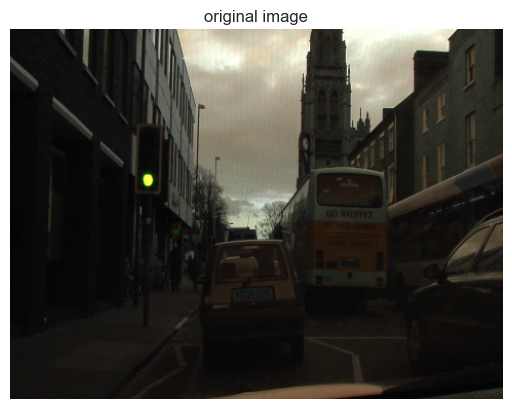

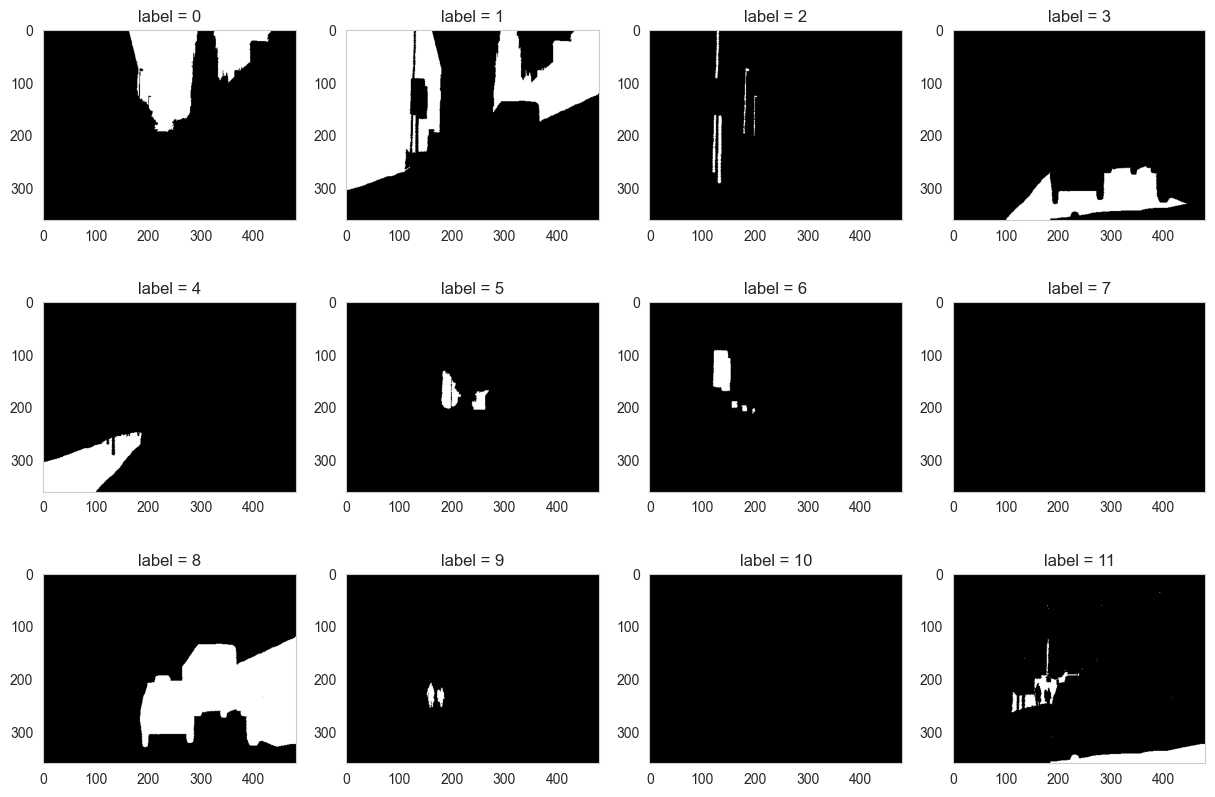

In [73]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

"""
os: file path management
seaborn, matplotlib.pyplot :plotting
"""

# set seaborn style
sns.set_style("whitegrid", {'axes.grid' : False})

# define data path 
dir_seg = "./data/Zdata/ann_dir/train"   # annotations_prepped_train
dir_img = "./data/Zdata/img_dir/train"  # images_prepped_train

ldseg = np.array(os.listdir(dir_seg))

## pick the first image file
fnm = ldseg[0]
print(fnm)

## read in the original image and segmentation labels
## Read first image from annotations_prepped_train and images_prepped_train with path "dir_seg +"/"+ fnm"

# Load annotations for the first training image
seg = cv2.imread(dir_seg  +"/"+ fnm)

# Load the first origin training image
img_is = cv2.imread(dir_img  +"/"+ fnm)

print("seg.shape={}, img_is.shape={}".format(seg.shape,img_is.shape))
print(seg[0][0])

## Check the number of labels
mi, ma = np.min(seg), np.max(seg)

n_classes = ma - mi + 1
print("minimum seg = {}, maximum seg = {}, Total number of segmentation classes = {}".format(mi,ma, n_classes))



# Plot original image from images_prepped_train image:

plt.imshow(img_is)
plt.axis('off')
plt.title('original image')
plt.show()


# Plot all class from annotations_prepped_train image:
fig = plt.figure(figsize=(15,10))
for k in range(mi, ma+1):
    ax = fig.add_subplot(3, int(n_classes / 3), k+1)
    ax.imshow((seg == k)*1.0)
    ax.set_title("label = {}".format(k))



plt.show()

In [74]:

"""
mapping 3 channel label to 1 channel label

"""


COLOR_TO_CLASS = {
    (0, 0, 0): 0,
    (1, 1, 1): 1,
    (2, 2, 2): 2,
    (3, 3, 3): 3,
    (4, 4, 4): 4,
    (5, 5, 5): 5,
    (6, 6, 6): 6,
    (7, 7, 7): 7,
    (8, 8, 8): 8,
    (9, 9, 9): 9,
    (10, 10, 10): 10,
    (11, 11, 11): 11,
}

In [75]:
def rgb_to_class_label(seg_rgb, color_to_class):
    """
    Convert RGB segmentation map to single-channel class indices.

    Args:
        seg_rgb (numpy.ndarray): RGB segmentation map of shape (H, W, 3).
        color_to_class (dict): Mapping from RGB tuples to class indices.

    Returns:
        numpy.ndarray: Single-channel segmentation map of shape (H, W).
    """
    h, w, _ = seg_rgb.shape
    seg_class = np.zeros((h, w), dtype=np.uint8)

    for color, cls_idx in color_to_class.items():
        mask = np.all(seg_rgb == color, axis=-1)
        seg_class[mask] = cls_idx

    return seg_class


In [76]:
# 使用函数转换标签
seg_class = rgb_to_class_label(seg, COLOR_TO_CLASS)

# 打印转换后的标签形状和类别分布
print("seg_class.shape:", seg_class.shape)
print("Unique labels in segmentation map:", np.unique(seg_class))


seg_class.shape: (360, 480)
Unique labels in segmentation map: [ 0  1  2  3  4  5  6  8  9 11]


In [77]:
def process_all_labels(input_dir, output_dir, color_to_class):
    """
    Process all RGB segmentation labels in a directory and save as single-channel maps.

    Args:
        input_dir (str): Path to the input directory containing RGB labels.
        output_dir (str): Path to save the processed single-channel labels.
        color_to_class (dict): Mapping from RGB tuples to class indices.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith(".png"):  # Ensure only .png files are processed
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)

            # Read the RGB label
            seg_rgb = cv2.imread(input_path)

            # Convert to single-channel
            seg_class = rgb_to_class_label(seg_rgb, color_to_class)

            # Save the processed label
            cv2.imwrite(output_path, seg_class)
            print(f"Processed: {filename} -> Saved to: {output_path}")

# 输入和输出路径
input_dir1 = "./data/Zdata/ann_dir/train"  # 输入的RGB标签路径
output_dir1 = "./data/Zdata/ann_dir/processed_train"  # 输出的单通道标签路径

input_dir2 = "./data/Zdata/ann_dir/val"  # 输入的RGB标签路径
output_dir2 = "./data/Zdata/ann_dir/processed_val"  # 输出的单通道标签路径

# 批量处理
process_all_labels(input_dir1, output_dir1, COLOR_TO_CLASS)
process_all_labels(input_dir2, output_dir2, COLOR_TO_CLASS)


Processed: 0001TP_006690.png -> Saved to: ./data/Zdata/ann_dir/processed_train\0001TP_006690.png
Processed: 0001TP_006720.png -> Saved to: ./data/Zdata/ann_dir/processed_train\0001TP_006720.png
Processed: 0001TP_006750.png -> Saved to: ./data/Zdata/ann_dir/processed_train\0001TP_006750.png
Processed: 0001TP_006780.png -> Saved to: ./data/Zdata/ann_dir/processed_train\0001TP_006780.png
Processed: 0001TP_006810.png -> Saved to: ./data/Zdata/ann_dir/processed_train\0001TP_006810.png
Processed: 0001TP_006840.png -> Saved to: ./data/Zdata/ann_dir/processed_train\0001TP_006840.png
Processed: 0001TP_006870.png -> Saved to: ./data/Zdata/ann_dir/processed_train\0001TP_006870.png
Processed: 0001TP_006900.png -> Saved to: ./data/Zdata/ann_dir/processed_train\0001TP_006900.png
Processed: 0001TP_006930.png -> Saved to: ./data/Zdata/ann_dir/processed_train\0001TP_006930.png
Processed: 0001TP_006960.png -> Saved to: ./data/Zdata/ann_dir/processed_train\0001TP_006960.png
Processed: 0001TP_006990.png -

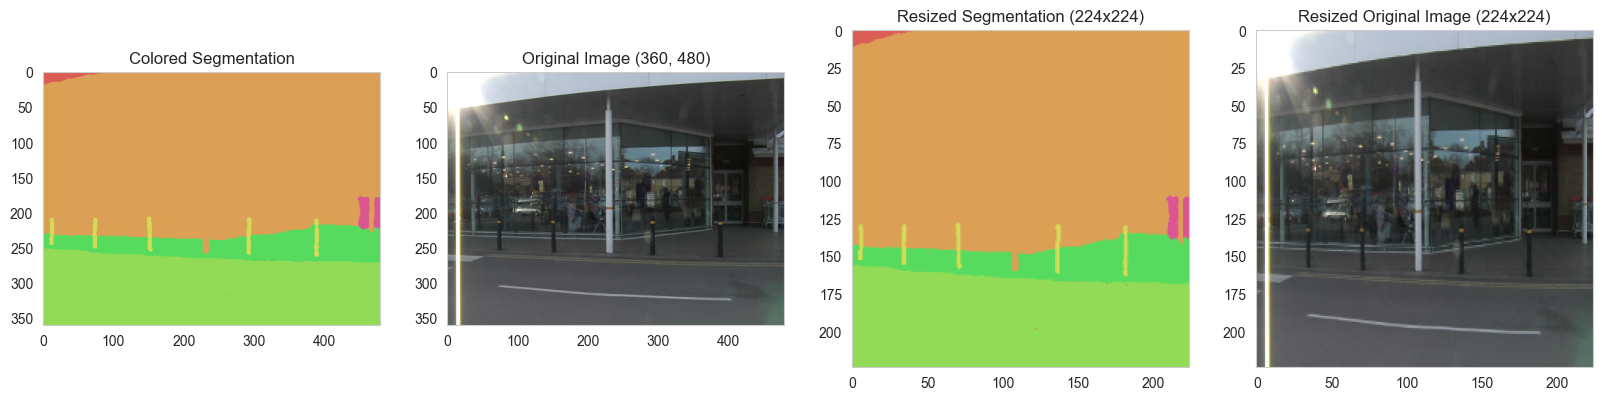

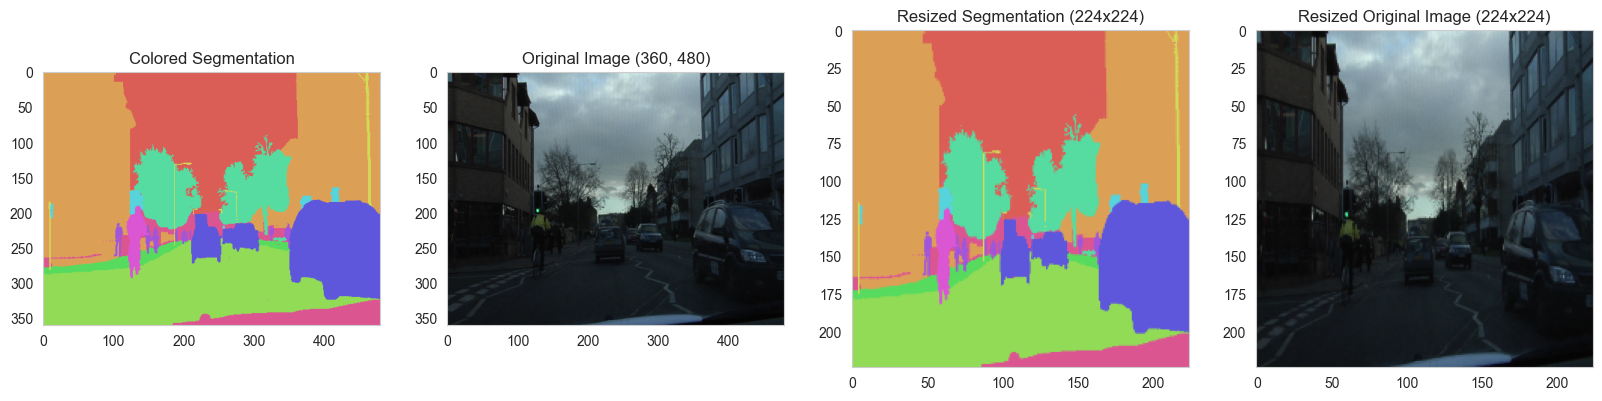

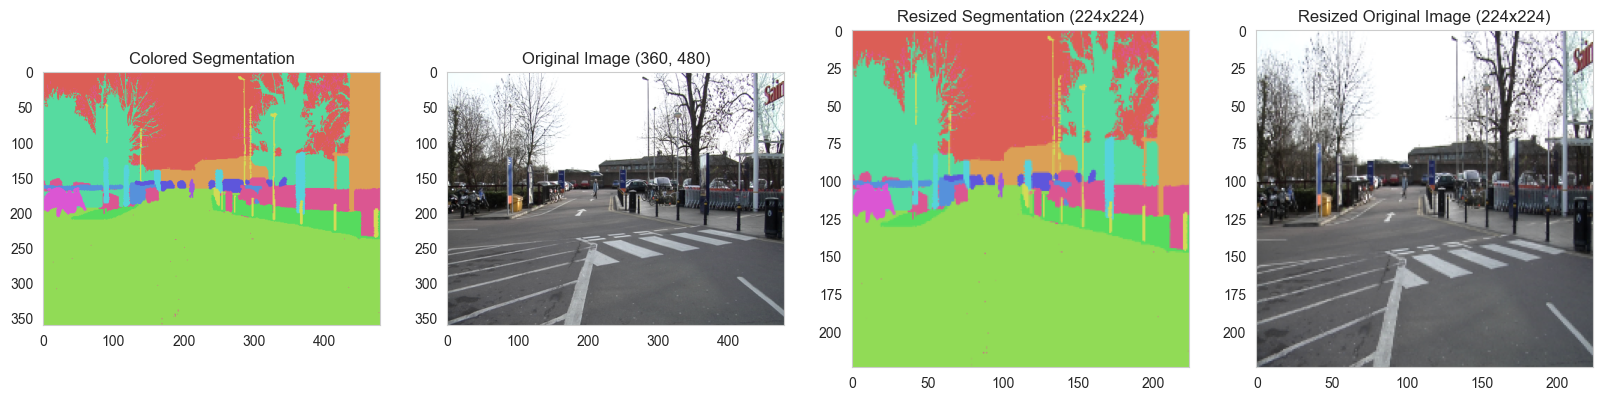

In [78]:
import random

def give_color_to_seg_img(seg,n_classes):
    '''
    seg : size is (input_width,input_height,3) -> (w, h, (x, x, x))
    assign color to each class 
        You can use sns color palette to assign color pattern
        colors = sns.color_palette("hls", n_classes)
    '''

    
    if len(seg.shape) != 2:
        raise ValueError("Input segmentation map must be single-channel (H, W).")

    seg_img = np.zeros((seg.shape[0], seg.shape[1], 3), dtype=np.float32)
    
    # Generate color palette for classes
    colors = sns.color_palette("hls", n_classes)
    
    for c in range(n_classes):
        # Create a mask for the current class
        mask = (seg == c)
        
        # Assign colors to each channel
        seg_img[:, :, 0] += mask * colors[c][0]  # Red channel
        seg_img[:, :, 1] += mask * colors[c][1]  # Green channel
        seg_img[:, :, 2] += mask * colors[c][2]  # Blue channel

    return seg_img


input_height , input_width = 224 , 224
output_height , output_width = 224 , 224


# 单通道标签路径
ldseg = np.array(os.listdir(dir_seg))
for fnm in ldseg[np.random.choice(len(ldseg), 3, replace=False)]:
    # 读取单通道标签
    seg = cv2.imread(os.path.join(dir_seg, fnm), cv2.IMREAD_GRAYSCALE)  # (360, 480)
    img_is = cv2.imread(os.path.join(dir_img, fnm))  # 原始 RGB 图像
    
    # 着色单通道标签
    seg_img = give_color_to_seg_img(seg, n_classes)

    # 可视化结果
    fig = plt.figure(figsize=(20, 40))
    
    # 显示彩色标签
    ax = fig.add_subplot(1, 4, 1)
    ax.imshow(seg_img)
    ax.set_title("Colored Segmentation")
    
    # 显示原始图像
    ax = fig.add_subplot(1, 4, 2)
    ax.imshow(img_is[:, :, ::-1] / 255.0)  # OpenCV 读取为 BGR，需要转换为 RGB
    ax.set_title("Original Image {}".format(img_is.shape[:2]))
    
    # 显示调整尺寸的彩色标签
    ax = fig.add_subplot(1, 4, 3)
    resized_seg = cv2.resize(seg_img, (input_width, input_height))
    ax.imshow(resized_seg)
    ax.set_title(f"Resized Segmentation ({input_width}x{input_height})")
    
    # 显示调整尺寸的原始图像
    ax = fig.add_subplot(1, 4, 4)
    resized_img = cv2.resize(img_is, (output_width, output_height))
    ax.imshow(resized_img[:, :, ::-1] / 255.0)
    ax.set_title(f"Resized Original Image ({output_width}x{output_height})")
    
    plt.show()


In [79]:
from torchvision import transforms
from PIL import Image

class SegmentationTransform:
    def __init__(self, size):
        self.image_transform = transforms.Compose([
            transforms.Resize(size, interpolation=transforms.InterpolationMode.BILINEAR),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        self.label_transform = transforms.Compose([
            transforms.Resize(size, interpolation=transforms.InterpolationMode.NEAREST),
        ])

    def __call__(self, image, label):
        image = self.image_transform(image)
        label = self.label_transform(label)
        return image, label


In [80]:
from torch.utils.data import Dataset
import os
from PIL import Image

class SegmentationDataset(Dataset):
    def __init__(self, image_dir, label_dir, transform=None):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.image_files = sorted(os.listdir(image_dir))
        self.label_files = sorted(os.listdir(label_dir))
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_files[idx])
        label_path = os.path.join(self.label_dir, self.label_files[idx])

        # 打开图像和标签
        image = Image.open(image_path).convert("RGB")
        label = Image.open(label_path)

        # 应用转换
        if self.transform:
            image, label = self.transform(image, label)  # 传递 image 和 label

        # 转换标签为张量并去掉多余维度
        label = torch.tensor(np.array(label), dtype=torch.long).squeeze()

        return image, label



In [81]:
from torch.utils.data import DataLoader


# 数据目录
image_dir = "./data/Zdata/img_dir/train"
label_dir = "./data/Zdata/ann_dir/processed_train"

# 创建变换
transform = SegmentationTransform(size=(224, 224))

# 创建数据集
train_dataset = SegmentationDataset(image_dir, label_dir, transform=transform)


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# 验证集加载
val_dataset = SegmentationDataset(
    "./data/Zdata/img_dir/val",
    "./data/Zdata/ann_dir/processed_val",
    transform=transform
)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)


In [82]:
import numpy as np
from PIL import Image

# 读取一个标签文件
label_path = "./data/Zdata/ann_dir/processed_train/0001TP_006690.png"  # 替换为实际文件路径
label = Image.open(label_path)

# 检查标签的值范围
label_array = np.array(label)
print("Label unique values:", np.unique(label_array))  # 应该是 0~11 之间的值


Label unique values: [ 0  1  2  3  4  5  6  8  9 11]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.64].


Images shape: torch.Size([16, 3, 224, 224])
Labels shape: torch.Size([16, 224, 224])


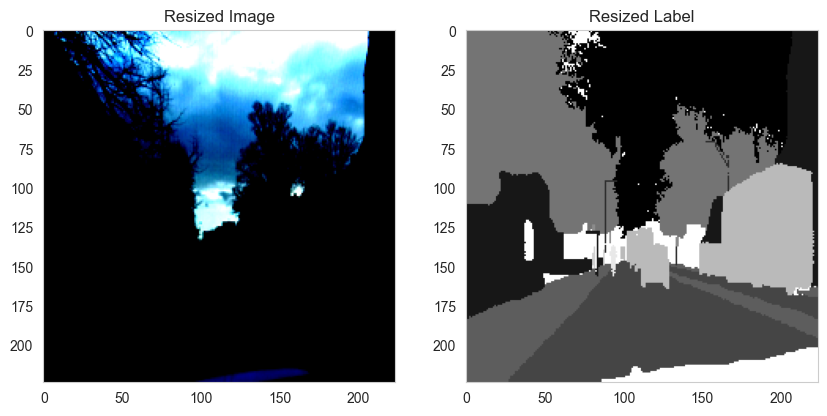

In [83]:
import matplotlib.pyplot as plt

# 从 DataLoader 中获取一批数据
images, labels = next(iter(train_loader))

# 验证标签形状
print(f"Images shape: {images.shape}")  # [batch_size, 3, 224, 224]
print(f"Labels shape: {labels.shape}")  # [batch_size, 224, 224]

# 显示第一张图片和对应的标签
plt.figure(figsize=(10, 5))

# 显示图片
plt.subplot(1, 2, 1)
plt.imshow(images[0].permute(1, 2, 0).cpu().numpy())  # 转换为 H, W, C 格式
plt.title("Resized Image")

# 显示标签
plt.subplot(1, 2, 2)
plt.imshow(labels[0].cpu().numpy(), cmap="gray")  # 转为 numpy 并设置灰度颜色映射
plt.title("Resized Label")

plt.show()


In [84]:
import torchvision
from torch import nn

# 加载未训练的 DeepLabv3 模型
model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=False)

# 修改主分类器
model.classifier[4] = nn.Conv2d(256, 12, kernel_size=(1, 1))  # 修改为 12 个类别

# 检查辅助分类器是否存在
if hasattr(model, "aux_classifier") and model.aux_classifier is not None:
    model.aux_classifier[4] = nn.Conv2d(256, 12, kernel_size=(1, 1))  # 修改为 12 个类别

# 将模型移到 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [85]:
import torch.optim as optim

# 定义损失函数 (CrossEntropyLoss)
criterion = nn.CrossEntropyLoss()

# 定义优化器 (Adam 或 SGD)
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [86]:
def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()  # 设置为训练模式
    total_loss = 0

    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)['out']  # DeepLabv3 的输出
        loss = criterion(outputs, labels)

        # Backward pass and优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)



In [87]:
def validate_one_epoch(model, dataloader, criterion, device):
    model.eval()  # 设置为评估模式
    total_loss = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)['out']
            loss = criterion(outputs, labels)

            total_loss += loss.item()

    return total_loss / len(dataloader)


In [88]:
num_epochs = 2

for epoch in range(num_epochs):
    train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss = validate_one_epoch(model, val_loader, criterion, device)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")


Epoch 1/2, Train Loss: 0.9051, Val Loss: 0.7191
Epoch 2/2, Train Loss: 0.5309, Val Loss: 0.5465


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..2.64].


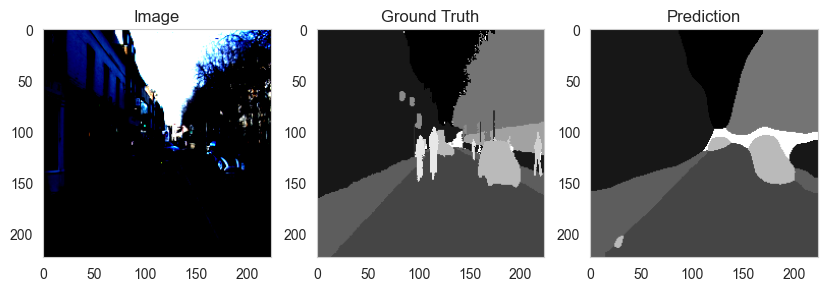

In [89]:
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model(images)['out']
        predictions = torch.argmax(outputs, dim=1).cpu().numpy()

        # 显示第一个样本的图像、标签和预测
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(images[0].permute(1, 2, 0).cpu().numpy())
        plt.title("Image")
        plt.subplot(1, 3, 2)
        plt.imshow(labels[0].cpu().numpy(), cmap="gray")
        plt.title("Ground Truth")
        plt.subplot(1, 3, 3)
        plt.imshow(predictions[0], cmap="gray")
        plt.title("Prediction")
        plt.show()
        break
